In [1]:
import pandas as pd
import plotly.express as px
import pycountry
import matplotlib as plt

In [2]:
df = pd.read_csv("student_subset.csv")
df.columns

Index(['CNT', 'CNTSCHID', 'CNTSTUID', 'ST001D01T', 'AGE', 'ESCS', 'HISCED',
       'HISEI', 'Math', 'Read', 'Science', 'LIFESAT', 'BELONG', 'BULLIED',
       'FEELSAFE', 'STRESAGR', 'PSYCHSYM', 'SOCCON', 'EXPWB', 'ANXMAT'],
      dtype='object')

In [3]:
df.isna().sum()


CNT               0
CNTSCHID          0
CNTSTUID          0
ST001D01T         0
AGE               0
ESCS          25468
HISCED        29696
HISEI         72843
Math              0
Read              0
Science           0
LIFESAT      506992
BELONG        52405
BULLIED       45763
FEELSAFE      96556
STRESAGR     321278
PSYCHSYM     500946
SOCCON       504426
EXPWB        527461
ANXMAT       137952
dtype: int64

In [4]:
df.shape

(613744, 20)

In [5]:
country_avg = df.groupby('CNT', as_index=False)[['Math', 'Read', 'Science']].mean()

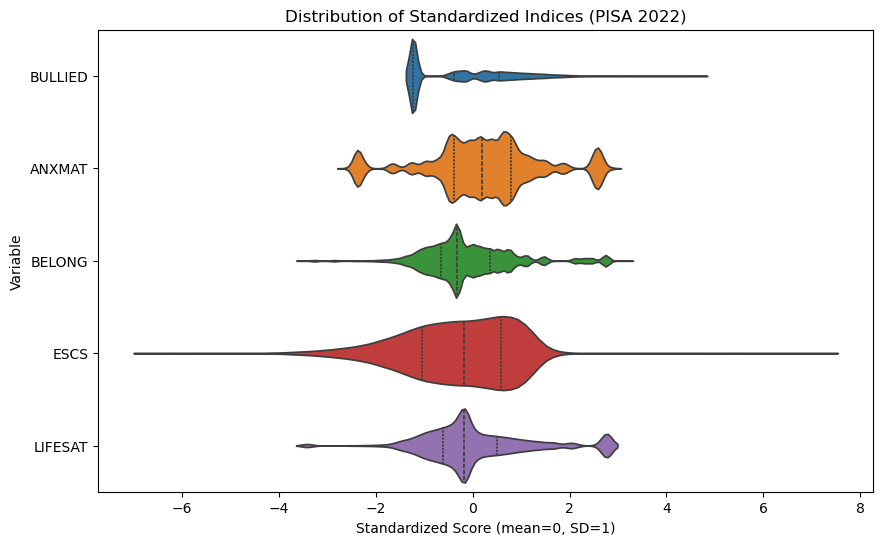

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# let's say your dataset is called df
cols = ['BULLIED', 'ANXMAT', 'BELONG', 'ESCS', 'LIFESAT']

# Set up the figure
plt.figure(figsize=(10, 6))

# Violin plot (shows full range + density)
sns.violinplot(data=df[cols], orient="h", inner="quartile")
plt.title("Distribution of Standardized Indices (PISA 2022)")
plt.xlabel("Standardized Score (mean=0, SD=1)")
plt.ylabel("Variable")
plt.show()

In [7]:
fig = px.choropleth(
    country_avg,
    locations = 'CNT',
    locationmode = 'country names',
    color = 'Math',
    color_continuous_scale = 'Viridis',
    title = 'PISA',
    projection = 'natural earth'
)
fig.show()

In [8]:
fig = px.choropleth(
    country_avg,
    locations = 'CNT',
    locationmode = 'country names',
    color = 'Math',
    color_continuous_scale = 'Viridis',
    title = 'PISA',
    projection = 'natural earth'
)
fig.show()


In [9]:
country_avg.sort_values(by='Math')

,CNT,Math,Read,Science
9,Cambodia,327.409293,321.201496,341.147256
18,Dominican Republic,339.828779,353.155239,361.725003
55,Paraguay,340.780280,376.701846,371.420468
19,El Salvador,345.121575,367.150405,374.212034
26,Guatemala,345.557129,375.550288,374.281581
...,...,...,...,...
12,Chinese Taipei,533.876128,504.324826,526.407532
35,Japan,534.929480,515.077928,546.255039
27,Hong Kong (China),546.030046,504.422723,524.423761
42,Macao (China),552.054269,510.362138,543.149306


In [10]:
df = pd.read_csv("student_subset.csv")

country_avg = df.groupby('CNT', as_index=False)[['Math', 'Read', 'Science']].mean()
def to_iso3(name):
    try: 
        return pycountry.countries.lookup(name).alpha_3
    except:
        return None

country_avg['iso3'] = country_avg['CNT'].apply(to_iso3)
fixes = {
    'Baku (Azerbaijan)': 'AZE',
    'Chinese Taipei': 'TWN',
    'Hong Kong (China)': 'HKG',
    'Korea': 'KOR',
    'Kosovo': 'XKX',
    'Macao (China)': 'MAC',
    'Palestinian Authority': 'PSE',
    'Ukrainian regions (18 of 27)': 'UKR'
}

for name, code in fixes.items():
    country_avg.loc[country_avg['CNT'] == name, 'iso3'] = code


In [12]:
df2 = pd.read_csv('WDICSV.csv')

In [13]:
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024'],
      dtype='object')

In [14]:
gdp = df2[df2["Indicator Code"] == "NY.GDP.MKTP.CD"][['Country Name', 'Country Code', '2022']]
gdp_per_capital = df2[df2["Indicator Code"] == "NY.GDP.PCAP.CD"][['Country Name', 'Country Code', '2022']]
gdp.rename(columns={'2022': '2022GDP'}, inplace=True)
gdp_per_capital.rename(columns={'2022': '2022GDPPC'}, inplace=True)
merged = gdp.merge(gdp_per_capital, how='left', on=['Country Name', 'Country Code'])
merged.to_csv("GDP_and_GDPPC.csv", index=False)


In [15]:
gdp = df2[df2["Indicator Code"] == "NY.GDP.MKTP.CD"][['Country Name', 'Country Code', '2022']]
gdp_per_capital = df2[df2["Indicator Code"] == "NY.GDP.PCAP.CD"][['Country Name', 'Country Code', '2022']]
gdp.rename(columns={'2022': '2022GDP'}, inplace=True)
gdp_per_capital.rename(columns={'2022': '2022GDPPC'}, inplace=True)
merged = gdp.merge(gdp_per_capital, how='left', on=['Country Name', 'Country Code'])
merged.to_csv("GDP_and_GDPPC.csv", index=False)


In [16]:
gdp_education = df2[df2["Indicator Code"] == "SE.XPD.TOTL.GD.ZS"][['Country Name', 'Country Code', '2022']]

gov_education = df2[df2["Indicator Code"] == "SE.XPD.TOTL.GB.ZS"][['Country Name', 'Country Code', '2022']]
primary = df2[df2["Indicator Code"] == "SE.XPD.PRIM.PC.ZS"][['Country Name', 'Country Code', '2022']]
secondary = df2[df2["Indicator Code"] == "SE.XPD.SECO.PC.ZS"][['Country Name', 'Country Code', '2022']]
tertiary = df2[df2["Indicator Code"] == "SE.XPD.TERT.PC.ZS"][['Country Name', 'Country Code', '2022']]
gdp_education.rename(columns={'2022': 'percentage_of_GDP'}, inplace=True)
gov_education.rename(columns={'2022': 'percentage_of_gov'}, inplace=True)
primary.rename(columns={'2022': 'primary_spend'}, inplace=True)
secondary.rename(columns={'2022': 'secondary_spend'}, inplace=True)
tertiary.rename(columns={'2022': 'tertiary_spend'}, inplace=True)
merged2 = gdp_education.merge(gov_education, on=['Country Name', 'Country Code'], how='left')

merged2.to_csv("Percentage_GDP_and_Percentage_Gov_budget.csv", index=False)


In [17]:

internet = df2[df2["Indicator Code"] == "IT.NET.USER.ZS"][['Country Name', 'Country Code', '2022']]
electricity = df2[df2["Indicator Code"] == "EG.ELC.ACCS.ZS"][['Country Name', 'Country Code', '2022']]
internet.rename(columns={'2022': 'internet'}, inplace=True)
electricity.rename(columns={'2022': 'electricity'}, inplace=True)
merged3 = internet.merge(electricity, how='left', on=['Country Name', 'Country Code'])
merged3.to_csv("Percentage_internet_and_electricity.csv", index=False)


In [18]:

poverty = df2[df2["Indicator Code"] == "SI.POV.NAHC"][['Country Name', 'Country Code', '2022']]
gini = df2[df2["Indicator Code"] == "SI.POV.GINI"][['Country Name', 'Country Code', '2022']]
poverty.rename(columns={'2022': 'poverty'}, inplace=True)
gini.rename(columns={'2022': 'gini'}, inplace=True)
merged4 = poverty.merge(gini, how='left', on=['Country Name', 'Country Code'])


In [19]:
attend = df2[df2["Indicator Code"] == "SE.SEC.ENRR"][['Country Name', 'Country Code', '2022']]
attend.to_csv("secondary_enrollment_rate_gross.csv", index=False)


In [31]:
df4 = pd.read_csv('data/democracy-index-eiu.csv')
set1 = set(df4['Entity'].unique())
set2 = set(final['Country Name'].unique())
intersection = set1 - set2
print(intersection)

{'Yemen', 'Gambia', 'Syria', 'East Timor', 'Laos', 'Democratic Republic of Congo', 'Turkey', 'Russia', 'Taiwan', 'North Korea', 'Kyrgyzstan', 'Iran', 'Slovakia', 'Vietnam', 'Cape Verde', 'Congo', 'South Korea', 'Egypt', 'Venezuela', 'Palestine'}


In [28]:
df1 = pd.read_csv("data/Percentage_GDP_and_Percentage_Gov_budget.csv")
df2 = pd.read_csv("data/Percentage_internet_and_electricity.csv")
df3 = pd.read_csv("data/secondary_enrollment_rate_gross.csv")
final = df1.merge(df2, on=['Country Name', "Country Code"], how='left').merge(df3, on=['Country Name', "Country Code"], how='left')

In [21]:
set1 = set(df['CNT'].unique())
set2 = set(final['Country Name'].unique())
intersection = set1 - set2
print(intersection)

{'Macao (China)', 'Korea', 'Ukrainian regions (18 of 27)', 'Republic of Moldova', 'Baku (Azerbaijan)', 'Palestinian Authority', 'Hong Kong (China)', 'Türkiye', 'Czech Republic', 'Chinese Taipei'}


In [22]:
final.rename(columns={'2022': '2022_Secondary_Gross_Enrollment_rate'}, inplace=True)
final.to_csv('Country_Merged.csv', index=False)

In [23]:
df = pd.read_csv("student_subset.csv")
'''
col(str): the column intrested in finding the null distribution
data(DataFrame): the DataFrame
country_col(str): Countries Column Name
'''
def null_distribution(col, data = df, country_col='CNT'):
    print(df[col].isna().mean() * 100)
    return df.groupby(data[country_col])[col].apply(lambda x: x.isna().mean() * 100).sort_values(ascending=False)
null_distribution('BULLIED')

7.456366172215126


CNT
Israel               100.000000
Baku (Azerbaijan)     23.445596
Albania               21.683798
Panama                17.605634
Georgia               14.476682
                        ...    
Singapore              0.696337
Viet Nam               0.692156
Japan                  0.572917
Türkiye                0.400000
Macao (China)          0.091241
Name: BULLIED, Length: 80, dtype: float64